


# SETUP ENVIROMENT

In [ ]:
#@title ทำการ SETUP ทุกอย่างให้เรียบร้อย
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # ติดตั้ง Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0                                                         # ติดตั้ง Package Python สำหรับเชื่อมต่อกับ Spark

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
spark-3.1.2-

In [ ]:
#@title ทำการ SET ENVIROMENT VARIABLE ให้ python รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
# ติดตั้ง PySpark ลงใน Python
!pip install pyspark==3.1.2


In [ ]:
# สร้าง Spark Session เพิ่อใช้งาน Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate() #getOrCreate()หมายถึงถ้ามันไม่มีให้ทำการสร้างใหม่

In [ ]:
import sys


In [ ]:
dt = spark.read.csv('/content/dataset_11_40.csv',header = True, inferSchema = True,)
dt.show()

+----+--------+------------------+---------+-------------+
|Year|   Month|       Energy type|Quantity	|         Unit|
+----+--------+------------------+---------+-------------+
|2005| January|PETROLEUM PRODUCTS| 53121.97|Million Bahts|
|2005| January|       ELECTRICITY| 24200.46|Million Bahts|
|2005| January|       NATURAL GAS|  1584.94|Million Bahts|
|2005| January|      LIGNITE/COAL|  1547.34|Million Bahts|
|2005| January|  RENEWABLE ENERGY|  9711.53|Million Bahts|
|2005|February|PETROLEUM PRODUCTS| 52044.06|Million Bahts|
|2005|February|       ELECTRICITY| 24933.91|Million Bahts|
|2005|February|       NATURAL GAS|  1314.52|Million Bahts|
|2005|February|      LIGNITE/COAL|  1455.47|Million Bahts|
|2005|February|  RENEWABLE ENERGY|  9154.73|Million Bahts|
|2005|   March|PETROLEUM PRODUCTS| 59974.79|Million Bahts|
|2005|   March|       ELECTRICITY| 28193.06|Million Bahts|
|2005|   March|       NATURAL GAS|   1533.5|Million Bahts|
|2005|   March|      LIGNITE/COAL|  1763.46|Million Baht

In [ ]:
dt.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Energy type: string (nullable = true)
 |-- Quantity	: double (nullable = true)
 |-- Unit: string (nullable = true)



# DATA CLEANSING WITH SPARK

In [ ]:
#@title ทำการตรวจเช็คความครบของข้อมูล

dt.summary("count").show() #ข้อมูลหายในช่วง Quantity ไป 1

+-------+----+-----+-----------+---------+----+
|summary|Year|Month|Energy type|Quantity	|Unit|
+-------+----+-----+-----------+---------+----+
|  count|1175| 1175|       1175|     1174|1175|
+-------+----+-----+-----------+---------+----+



In [ ]:
dt = dt.withColumnRenamed("Quantity	", "Quantity_update")
dt.show()


+----+--------+------------------+---------------+-------------+
|Year|   Month|       Energy type|Quantity_update|         Unit|
+----+--------+------------------+---------------+-------------+
|2005| January|PETROLEUM PRODUCTS|       53121.97|Million Bahts|
|2005| January|       ELECTRICITY|       24200.46|Million Bahts|
|2005| January|       NATURAL GAS|        1584.94|Million Bahts|
|2005| January|      LIGNITE/COAL|        1547.34|Million Bahts|
|2005| January|  RENEWABLE ENERGY|        9711.53|Million Bahts|
|2005|February|PETROLEUM PRODUCTS|       52044.06|Million Bahts|
|2005|February|       ELECTRICITY|       24933.91|Million Bahts|
|2005|February|       NATURAL GAS|        1314.52|Million Bahts|
|2005|February|      LIGNITE/COAL|        1455.47|Million Bahts|
|2005|February|  RENEWABLE ENERGY|        9154.73|Million Bahts|
|2005|   March|PETROLEUM PRODUCTS|       59974.79|Million Bahts|
|2005|   March|       ELECTRICITY|       28193.06|Million Bahts|
|2005|   March|       NAT

In [ ]:
dt.where(dt.Quantity_update.isNull()).show() #เจอข้อมูลที่เป็น Null แล้ว

+----+--------+------------------+---------------+-------------+
|Year|   Month|       Energy type|Quantity_update|         Unit|
+----+--------+------------------+---------------+-------------+
|2006|November|PETROLEUM PRODUCTS|           null|Million Bahts|
+----+--------+------------------+---------------+-------------+



In [ ]:
#เราทำการ Assume ว่าหากเป็น null ให้ทำการให้ Quantity นั้นเป็น 0 ไปเลย
from pyspark.sql.functions import when
dt_clean = dt.withColumn("Quantity_Clean",when(dt["Quantity_update"].isNull(),'0').otherwise(dt["Quantity_update"]))
dt_clean.show()

+----+--------+------------------+---------------+-------------+--------------+
|Year|   Month|       Energy type|Quantity_update|         Unit|Quantity_Clean|
+----+--------+------------------+---------------+-------------+--------------+
|2005| January|PETROLEUM PRODUCTS|       53121.97|Million Bahts|      53121.97|
|2005| January|       ELECTRICITY|       24200.46|Million Bahts|      24200.46|
|2005| January|       NATURAL GAS|        1584.94|Million Bahts|       1584.94|
|2005| January|      LIGNITE/COAL|        1547.34|Million Bahts|       1547.34|
|2005| January|  RENEWABLE ENERGY|        9711.53|Million Bahts|       9711.53|
|2005|February|PETROLEUM PRODUCTS|       52044.06|Million Bahts|      52044.06|
|2005|February|       ELECTRICITY|       24933.91|Million Bahts|      24933.91|
|2005|February|       NATURAL GAS|        1314.52|Million Bahts|       1314.52|
|2005|February|      LIGNITE/COAL|        1455.47|Million Bahts|       1455.47|
|2005|February|  RENEWABLE ENERGY|      

In [ ]:
dt_clean.where(dt.Quantity_update.isNull()).show() #ยังมีข้อมูล Null อยู่เราจะทำการนำเอา Quantity_update drop แล้วนำเอา Quantity_clean มาใช้แทน


+----+--------+------------------+---------------+-------------+--------------+
|Year|   Month|       Energy type|Quantity_update|         Unit|Quantity_Clean|
+----+--------+------------------+---------------+-------------+--------------+
|2006|November|PETROLEUM PRODUCTS|           null|Million Bahts|             0|
+----+--------+------------------+---------------+-------------+--------------+



In [ ]:
dt_clean = dt_clean.drop('Quantity_update').withColumnRenamed('Quantity_Clean','Quantity_update')

In [ ]:
dt_clean.where(dt_clean.Quantity_update.isNull()).show() #จะเห็นได้ว่าไม่มี Null แล้ว

+----+-----+-----------+----+---------------+
|Year|Month|Energy type|Unit|Quantity_update|
+----+-----+-----------+----+---------------+
+----+-----+-----------+----+---------------+



In [ ]:
dt_clean.where(dt_clean.Quantity_update == '0').show() # จะเห็นได้ว่าข้อมูลจาก Null เปลี่ยนเป็น 0 แล้ว

+----+--------+------------------+-------------+---------------+
|Year|   Month|       Energy type|         Unit|Quantity_update|
+----+--------+------------------+-------------+---------------+
|2006|November|PETROLEUM PRODUCTS|Million Bahts|              0|
+----+--------+------------------+-------------+---------------+



In [ ]:
dt_clean.summary("count").show() #ข้อมูลกลับมาครบแล้ว

+-------+----+-----+-----------+----+---------------+
|summary|Year|Month|Energy type|Unit|Quantity_update|
+-------+----+-----+-----------+----+---------------+
|  count|1175| 1175|       1175|1175|           1175|
+-------+----+-----+-----------+----+---------------+



In [ ]:
#@title อยากทำให้ค่าของ Quantity_Clean มีเลขทศนิยมเท่ากันทุกจำนวน
from pyspark.sql.functions import  col
from pyspark.sql.types import IntegerType
dt_clean = dt_clean.withColumn('Quantity_update', col("Quantity_update").cast('decimal(12,2)'))
dt_clean.show()

+----+--------+------------------+-------------+---------------+
|Year|   Month|       Energy type|         Unit|Quantity_update|
+----+--------+------------------+-------------+---------------+
|2005| January|PETROLEUM PRODUCTS|Million Bahts|       53121.97|
|2005| January|       ELECTRICITY|Million Bahts|       24200.46|
|2005| January|       NATURAL GAS|Million Bahts|        1584.94|
|2005| January|      LIGNITE/COAL|Million Bahts|        1547.34|
|2005| January|  RENEWABLE ENERGY|Million Bahts|        9711.53|
|2005|February|PETROLEUM PRODUCTS|Million Bahts|       52044.06|
|2005|February|       ELECTRICITY|Million Bahts|       24933.91|
|2005|February|       NATURAL GAS|Million Bahts|        1314.52|
|2005|February|      LIGNITE/COAL|Million Bahts|        1455.47|
|2005|February|  RENEWABLE ENERGY|Million Bahts|        9154.73|
|2005|   March|PETROLEUM PRODUCTS|Million Bahts|       59974.79|
|2005|   March|       ELECTRICITY|Million Bahts|       28193.06|
|2005|   March|       NAT

In [ ]:
#@title ทำการเช็คว่ามีเดือนไหนคำไหนที่สะกดผิดหรือไม่ Lexical errors
dt_clean.select('Month').distinct().show(truncate=False)
print("Month_Total",dt_clean.select('Month').distinct().count()) #ไม่มีเดือนไหนเขียนผิด

+---------+
|Month    |
+---------+
|July     |
|November |
|February |
|January  |
|March    |
|October  |
|May      |
|August   |
|April    |
|June     |
|December |
|September|
+---------+

Month_Total 12


In [ ]:
dt_clean.select('Energy type').distinct().show(truncate=False)  #ทุกประเภทเขียนถูกต้อง
dt_clean.select('Unit').distinct().show(truncate=False)
dt_clean.select('Year').distinct().show(truncate=False)
print("Year_Total",dt_clean.select('Year').distinct().count())

+------------------+
|Energy type       |
+------------------+
|NATURAL GAS       |
|RENEWABLE ENERGY  |
|ELECTRICITY       |
|PETROLEUM PRODUCTS|
|LIGNITE/COAL      |
+------------------+

+-------------+
|Unit         |
+-------------+
|Million Bahts|
+-------------+

+----+
|Year|
+----+
|2007|
|2018|
|2015|
|2023|
|2006|
|2022|
|2013|
|2014|
|2019|
|2020|
|2012|
|2009|
|2016|
|2024|
|2005|
|2010|
|2011|
|2008|
|2017|
|2021|
+----+

Year_Total 20


#  Exploratory Data Analysis

In [ ]:
#@title ทำการ Sum ค่าและทำการสร้าง Column  Energy_Type_Sum
import matplotlib.pyplot as plt
import seaborn as sns
pandas_df = dt_clean.toPandas()
# ทำการ Convert Pyspark dataFrame เป็น Pandas DataFrame


total_NATURAL_GAS_products = pandas_df.loc[pandas_df['Energy type'] == 'NATURAL GAS', 'Quantity_update'].sum()

print("Total Quantity of NATURAL GAS:", total_NATURAL_GAS_products)

total_RENEWABLE_ENERGY_products = pandas_df.loc[pandas_df['Energy type'] == 'RENEWABLE ENERGY', 'Quantity_update'].sum()

print("Total Quantity of RENEWABLE ENERGY:", total_RENEWABLE_ENERGY_products)

total_ELECTRICITY_products = pandas_df.loc[pandas_df['Energy type'] == 'ELECTRICITY', 'Quantity_update'].sum()

print("Total Quantity of ELECTRICITY:", total_ELECTRICITY_products)

total_PETROLEUM_PRODUCTS_products = pandas_df.loc[pandas_df['Energy type'] == 'PETROLEUM PRODUCTS', 'Quantity_update'].sum()

print("Total Quantity of PETROLEUM PRODUCTS:", total_PETROLEUM_PRODUCTS_products)

total_LIGNITE_COAL_products = pandas_df.loc[pandas_df['Energy type'] == 'LIGNITE/COAL', 'Quantity_update'].sum()

print("Total Quantity of LIGNITE/COAL:", total_LIGNITE_COAL_products)



Total Quantity of NATURAL GAS: 1800988.99
Total Quantity of RENEWABLE ENERGY: 2012884.77
Total Quantity of ELECTRICITY: 11901375.35
Total Quantity of PETROLEUM PRODUCTS: 22618777.70
Total Quantity of LIGNITE/COAL: 657048.65


In [ ]:
from pyspark.sql.functions import when, col

#สร้าง Column ใหม่ในชื่อ Energy_Type_sum
dt_clean = dt_clean.withColumn(
    "Energy_Type_sum",
    when(col("Energy type") == "NATURAL GAS", total_NATURAL_GAS_products)
    .when(col("Energy type") == "RENEWABLE ENERGY", total_RENEWABLE_ENERGY_products)
    .when(col("Energy type") == "ELECTRICITY", total_ELECTRICITY_products)
    .when(col("Energy type") == "PETROLEUM PRODUCTS", total_PETROLEUM_PRODUCTS_products)
    .when(col("Energy type") == "LIGNITE/COAL", total_LIGNITE_COAL_products)
    .otherwise(0)
)

In [ ]:
dt_clean.show()
dt_clean.select('Energy type', 'Energy_Type_sum').distinct().show(truncate=False)



+----+--------+------------------+-------------+---------------+---------------+
|Year|   Month|       Energy type|         Unit|Quantity_update|Energy_Type_sum|
+----+--------+------------------+-------------+---------------+---------------+
|2005| January|PETROLEUM PRODUCTS|Million Bahts|       53121.97|    22618777.70|
|2005| January|       ELECTRICITY|Million Bahts|       24200.46|    11901375.35|
|2005| January|       NATURAL GAS|Million Bahts|        1584.94|     1800988.99|
|2005| January|      LIGNITE/COAL|Million Bahts|        1547.34|      657048.65|
|2005| January|  RENEWABLE ENERGY|Million Bahts|        9711.53|     2012884.77|
|2005|February|PETROLEUM PRODUCTS|Million Bahts|       52044.06|    22618777.70|
|2005|February|       ELECTRICITY|Million Bahts|       24933.91|    11901375.35|
|2005|February|       NATURAL GAS|Million Bahts|        1314.52|     1800988.99|
|2005|February|      LIGNITE/COAL|Million Bahts|        1455.47|      657048.65|
|2005|February|  RENEWABLE E

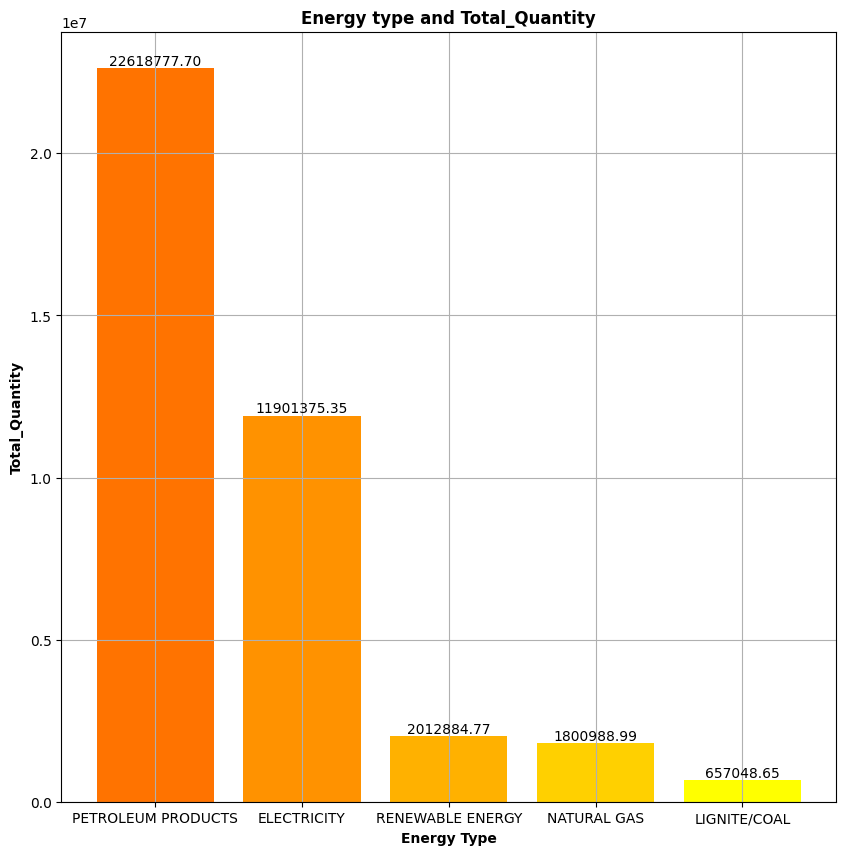

In [ ]:
#@title ทำการสร้าง Bar chart
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns


dt_clean_plot = dt_clean.select('Energy_Type_sum', 'Energy type').distinct()

pandas_df = dt_clean_plot.toPandas()  # แปลงเป็น Pandas เพื่อให้พล็อตกราฟได้

plt.figure(figsize=(10, 10))
colors = ['#FF7300', '#FF9200', '#FFB100', '#FFD000', '#FFFF00']
plt.grid(True)


pandas_df = pandas_df.sort_values(by='Energy_Type_sum', ascending=False)

# ทำการสร้าง Bar chart
bars = plt.bar(x=pandas_df['Energy type'], height=pandas_df['Energy_Type_sum'], color=colors)
plt.xlabel('Energy Type', fontweight = 'bold')
plt.ylabel('Total_Quantity', fontweight = 'bold')
plt.title('Energy type and Total_Quantity', fontweight = 'bold')

# ให้เห็นค่าตัวเลขที่โชว์แต่ละกราฟ
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


# Save data to .CSV

In [ ]:
dt_clean.write.csv('data_cleaned_Energy_consumption.csv', header = True)
